In [1]:
                                                           # Capstone Project
#                                                  Unleashing Insights From Football Data

In [3]:
import pandas as pd

# Load Excel files

# Replace 'path_to_file' with the actual file paths
games = pd.read_excel(r'C:\Users\HP\ds_c8_datafiles-main\games.xlsx')
game_lineups = pd.read_excel(r'C:\Users\HP\ds_c8_datafiles-main/game_lineups.xlsx')
game_events = pd.read_excel(r'C:\Users\HP\ds_c8_datafiles-main/game_events.xlsx')
appearances = pd.read_excel(r'C:\Users\HP\ds_c8_datafiles-main/appearances.xlsx')
players = pd.read_excel(r'C:\Users\HP\ds_c8_datafiles-main/players.xlsx')

In [5]:
# Inspect the data

print(games.head())
print(game_lineups.head())
print(game_events.head())
print(appearances.head())
print(players.head())

   game_id competition_id  season         round       date  home_club_goals  \
0  2222734            RU1    2012  19. Matchday 2012-12-07                2   
1  2224572            DK1    2012   3. Matchday 2012-07-28                1   
2  2224628            DK1    2012  22. Matchday 2013-03-08                2   
3  2224655            DK1    2012  22. Matchday 2013-03-10                0   
4  2224729            DK1    2012   1. Matchday 2012-07-15                0   

   away_club_goals  home_club_position  away_club_position  \
0                3                11.0                10.0   
1                2                12.0                 1.0   
2                0                 3.0                10.0   
3                3                 6.0                12.0   
4                1                 9.0                 5.0   

  home_club_manager_name away_club_manager_name               stadium  \
0        Miodrag Bozovic       Slavoljub Muslin               Olimp-2   
1     

In [7]:
# Checking for null values

print("Null values in 'games':")
print(games.isnull().sum())
print("\nNull values in 'games_lineups':")
print(game_lineups.isnull().sum())
print("\nNull values in 'games_event':")
print(game_events.isnull().sum())
print("\nNull values in 'appearances':")
print(appearances.isnull().sum())
print("\nNull values in 'players':")
print(players.isnull().sum())

Null values in 'games':
game_id                      0
competition_id               0
season                       0
round                        0
date                         0
home_club_goals              0
away_club_goals              0
home_club_position         479
away_club_position         479
home_club_manager_name       5
away_club_manager_name       5
stadium                      0
attendance                 115
referee                      2
home_club_formation       3268
away_club_formation       3268
home_club_name             110
away_club_name              63
aggregate                    0
competition_type             0
dtype: int64

Null values in 'games_lineups':
game_lineups_id    0
game_id            0
type               0
number             0
player_id          0
player_name        0
team_captain       0
position           0
dtype: int64

Null values in 'games_event':
game_event_id          0
date                   0
game_id                0
minute                 

In [9]:
# Treatment of null values - Fill null values with mode:

games.fillna(games.mode().iloc[0], inplace=True)
game_lineups.fillna(game_lineups.mode().iloc[0], inplace=True)
game_events.fillna(game_events.mode().iloc[0], inplace=True)
appearances.fillna(appearances.mode().iloc[0], inplace=True)
players.fillna(players.mode().iloc[0], inplace=True)

In [11]:
#  drop the specific columns 
games.drop(['home_club_formation', 'away_club_formation'], axis=1, inplace=True)

In [13]:
# Again check the null values after treatment 

print("Null values in 'games':")
print(games.isnull().sum())
print("\nNull values in 'games_lineups':")
print(game_lineups.isnull().sum())
print("\nNull values in 'games_event':")
print(game_events.isnull().sum())
print("\nNull values in 'appearances':")
print(appearances.isnull().sum())
print("\nNull values in 'players':")
print(players.isnull().sum())

Null values in 'games':
game_id                   0
competition_id            0
season                    0
round                     0
date                      0
home_club_goals           0
away_club_goals           0
home_club_position        0
away_club_position        0
home_club_manager_name    0
away_club_manager_name    0
stadium                   0
attendance                0
referee                   0
home_club_name            0
away_club_name            0
aggregate                 0
competition_type          0
dtype: int64

Null values in 'games_lineups':
game_lineups_id    0
game_id            0
type               0
number             0
player_id          0
player_name        0
team_captain       0
position           0
dtype: int64

Null values in 'games_event':
game_event_id       0
date                0
game_id             0
minute              0
type                0
player_id           0
description         0
player_in_id        0
player_assist_id    0
dtype: int64

Nu

In [15]:
# After that merging the data

merged_data = games.merge(game_lineups, on='game_id', how='outer')
merged_data = merged_data.merge(game_events, on='game_id', how='outer')
merged_data = merged_data.merge(appearances, on='game_id', how='outer')
merged_data = merged_data.merge(players, on='player_id', how='outer')

In [17]:
# Info about merged data 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   game_id                      4686 non-null   float64       
 1   competition_id_x             3809 non-null   object        
 2   season                       3809 non-null   float64       
 3   round                        3809 non-null   object        
 4   date_x                       3809 non-null   datetime64[ns]
 5   home_club_goals              3809 non-null   float64       
 6   away_club_goals              3809 non-null   float64       
 7   home_club_position           3809 non-null   float64       
 8   away_club_position           3809 non-null   float64       
 9   home_club_manager_name       3809 non-null   object        
 10  away_club_manager_name       3809 non-null   object        
 11  stadium                      3809 non-null 

In [19]:
# Save the merged Data to a new Excel file if
merged_data.to_excel(r'C:\Users\HP\ds_c8_datafiles-main/merged_football_data_Capstone_project_.xlsx', index=False)

In [20]:
# 1 - Performance analysis 
#	Question 1: How does the home and away team's league position affect the outcome of the match?



# Extract relevant columns for analysis
analysis_data = games[['home_club_position', 'away_club_position', 'home_club_goals', 'away_club_goals']]

# Determine match outcome
def determine_outcome(row):
    if row['home_club_goals'] > row['away_club_goals']:
        return 'Home Win'
    elif row['home_club_goals'] < row['away_club_goals']:
        return 'Away Win'
    else:
        return 'Draw'

analysis_data['outcome'] = analysis_data.apply(determine_outcome, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_12488\1395547802.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['outcome'] = analysis_data.apply(determine_outcome, axis=1)


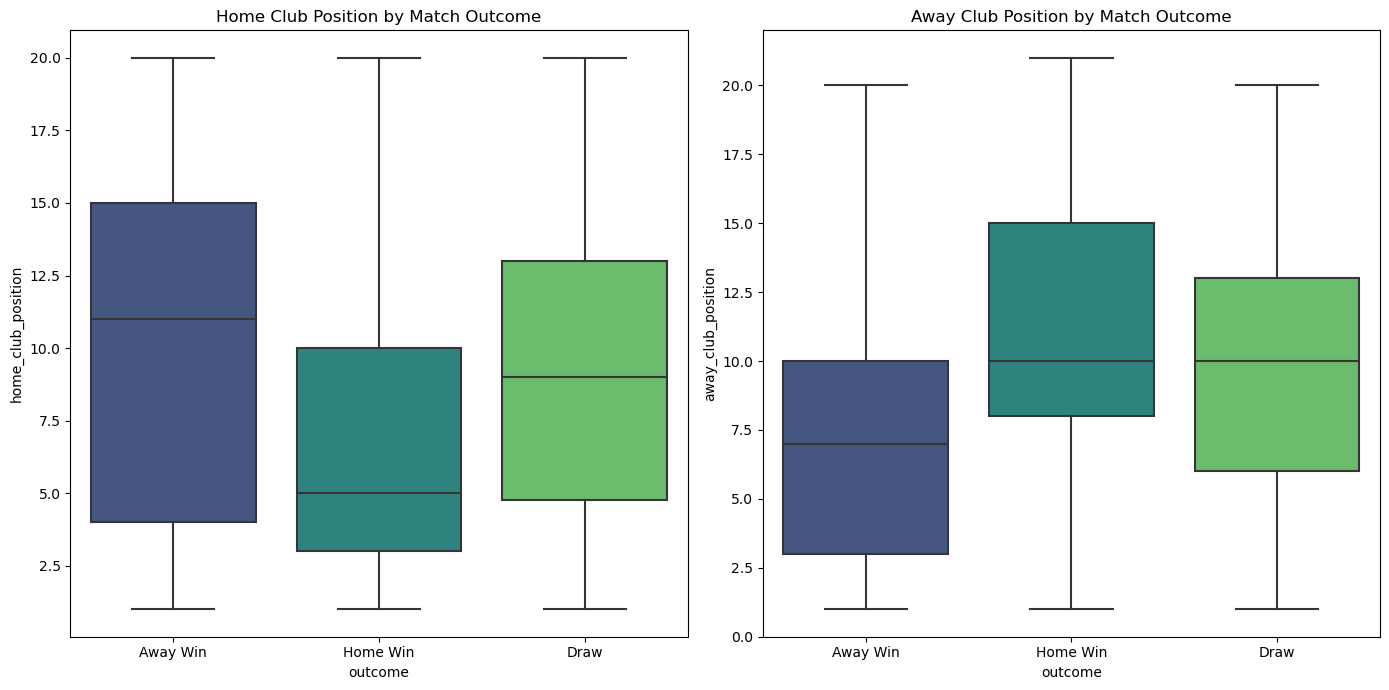

In [23]:
# Visualization 1 Box plot


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

# Plot Home Club Position
plt.subplot(1, 2, 1)
sns.boxplot(data=analysis_data, x='outcome', y='home_club_position', palette='viridis')
plt.title('Home Club Position by Match Outcome')

# Plot Away Club Position
plt.subplot(1, 2, 2)
sns.boxplot(data=analysis_data, x='outcome', y='away_club_position', palette='viridis')
plt.title('Away Club Position by Match Outcome')

plt.tight_layout()
plt.show()

In [1]:
''' Interpretation:
    Left Box Plot: Home Club Position
    
     Away Win: The median position of home clubs in matches where they lose to the away team is relatively high (around 10th place).
              This indicates that the home clubs tend to be lower-ranked when they lose at home.
     Home Win: The median home club position in matches they win is lower (around 5th place),
              indicating that higher-ranked teams (lower numerical value) tend to win at home.
      Draw: The median position of home clubs in drawn matches is around 10th place, similar to the 'Away Win' category. 
              This suggests that home teams with mid-table rankings often draw or lose.
      Interpretation: 
      
  Right Box Plot: Away Club Position
  
    Away Win: The median position of away clubs in matches they win is relatively low (around 6th place), 
              indicating that stronger away teams tend to win.
    Home Win: The median away club position in matches they lose to the home team is around 11th place. 
              This suggests that weaker away teams tend to lose.
    Draw: The median away club position in drawn matches is about 9th place, indicating that away teams in the mid-table rankings are likely to draw.  '''

" Interpretation:\n    Left Box Plot: Home Club Position\n    \n     Away Win: The median position of home clubs in matches where they lose to the away team is relatively high (around 10th place).\n              This indicates that the home clubs tend to be lower-ranked when they lose at home.\n     Home Win: The median home club position in matches they win is lower (around 5th place),\n              indicating that higher-ranked teams (lower numerical value) tend to win at home.\n      Draw: The median position of home clubs in drawn matches is around 10th place, similar to the 'Away Win' category. \n              This suggests that home teams with mid-table rankings often draw or lose.\n      Interpretation: \n      \n  Right Box Plot: Away Club Position\n  \n    Away Win: The median position of away clubs in matches they win is relatively low (around 6th place), \n              indicating that stronger away teams tend to win.\n    Home Win: The median away club position in matches 

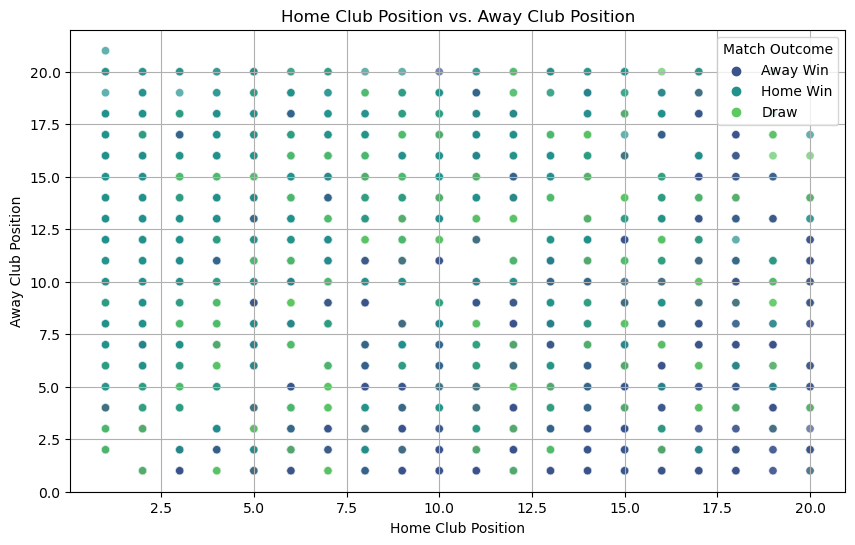

In [27]:
# Visualization 2 scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=analysis_data, x='home_club_position', y='away_club_position', hue='outcome', palette='viridis', alpha=0.7)
plt.title('Home Club Position vs. Away Club Position')
plt.xlabel('Home Club Position')
plt.ylabel('Away Club Position')
plt.legend(title='Match Outcome')
plt.grid(True)
plt.show()

In [29]:
'''Interpretation:
Home Win (Light Blue Dots):

Lower Home Club Position (Left Side): Most of the light blue dots are clustered towards the left side of the plot, particularly when the away team has
a higher position (lower rank).This indicates that higher-ranked home teams are more likely to win against lower-ranked away teams.

Higher Home Club Position (Right Side): There are fewer light blue dots on the right side, suggesting that lower-ranked home teams do not frequently win,
even against higher-ranked away teams.

Away Win (Dark Blue Dots):

Lower Away Club Position (Bottom Side): Dark blue dots are concentrated in the lower part of the plot, particularly when the home team has a
higher position (lower rank). This suggests that higher-ranked away teams are likely to win against lower-ranked home teams.

Higher Away Club Position (Top Side): There are fewer dark blue dots on the top side, indicating that lower-ranked away teams do not frequently win,
even against higher-ranked home teams.

Draw (Green Dots):

Mid-Table Matches: Green dots are scattered throughout the plot but tend to cluster in the middle where both home and away teams have mid-table 
positions. This suggests that draws are more likely when both teams are similarly ranked and not at the extreme ends of the table.

Balanced Distribution: The green dots are relatively evenly spread, indicating that draws can happen between teams of varying ranks,
though they are more common when both teams are of similar strength.'''

'Interpretation:\nHome Win (Light Blue Dots):\n\nLower Home Club Position (Left Side): Most of the light blue dots are clustered towards the left side of the plot, particularly when the away team has\na higher position (lower rank).This indicates that higher-ranked home teams are more likely to win against lower-ranked away teams.\n\nHigher Home Club Position (Right Side): There are fewer light blue dots on the right side, suggesting that lower-ranked home teams do not frequently win,\neven against higher-ranked away teams.\n\nAway Win (Dark Blue Dots):\n\nLower Away Club Position (Bottom Side): Dark blue dots are concentrated in the lower part of the plot, particularly when the home team has a\nhigher position (lower rank). This suggests that higher-ranked away teams are likely to win against lower-ranked home teams.\n\nHigher Away Club Position (Top Side): There are fewer dark blue dots on the top side, indicating that lower-ranked away teams do not frequently win,\neven against high

In [31]:
# 1 - Performance analysis 

# •	Question 2: What is the correlation between team performance (goals scored) and the type of competition?


#  For the correlation analysis, we need the home_club_goals, away_club_goals, and competition_type columns.
#   We may need to convert categorical variables into numerical format.

# Combine home and away goals to get total goals scored in a game
games['total_goals'] = games['home_club_goals'] + games['away_club_goals']

# Convert competition_type into numerical values (if categorical)
games['competition_type_num'] = games['competition_type'].astype('category').cat.codes

# Inspect the prepared data
print(games[['total_goals', 'competition_type', 'competition_type_num']].head())


   total_goals competition_type  competition_type_num
0            5  domestic_league                     1
1            3  domestic_league                     1
2            2  domestic_league                     1
3            3  domestic_league                     1
4            1  domestic_league                     1


In [33]:
# Now, we'll compute the correlation between total_goals and competition_type_num

# Calculate the correlation
correlation = games['total_goals'].corr(games['competition_type_num'])
print(f"Correlation between total goals scored and competition type: {correlation}")

Correlation between total goals scored and competition type: -0.07283094103308478


In [35]:
# Visualization 1 scatter plot

# Scatter Plot
plt.figure(figsize=(9, 5))
sns.scatterplot(data=games, x='competition_type_num', y='total_goals', hue='competition_type')
plt.title('Scatter Plot of Total Goals vs. Competition Type')
plt.xlabel('Competition Type (Numeric)')
plt.ylabel('Total Goals Scored')
plt.legend(title='Competition Type', loc='upper right')
plt.show()


In [37]:
'''Interpretation:

Domestic Cup (0.0):
The green dots, representing Domestic Cup matches, show a wide distribution of goals, ranging from 0 to 17.5 goals.
This indicates that matches in domestic cup competitions can vary greatly in goal-scoring.

Domestic League (1.0):
The blue dots show that most domestic league matches tend to have fewer goals, generally below 7.5 goals.
The goals are more concentrated, suggesting more consistency in scoring.

International Cup (2.0):
The orange dots for international cup matches also show fewer goals, similar to domestic leagues, with most matches scoring below 7.5 goals.

Other Competitions (3.0):
The red dots represent other competition types, with goal totals ranging widely, similar to the Domestic Cup.
This suggests variability in scoring in these competitions.'''

'Interpretation:\n\nDomestic Cup (0.0):\nThe green dots, representing Domestic Cup matches, show a wide distribution of goals, ranging from 0 to 17.5 goals.\nThis indicates that matches in domestic cup competitions can vary greatly in goal-scoring.\n\nDomestic League (1.0):\nThe blue dots show that most domestic league matches tend to have fewer goals, generally below 7.5 goals.\nThe goals are more concentrated, suggesting more consistency in scoring.\n\nInternational Cup (2.0):\nThe orange dots for international cup matches also show fewer goals, similar to domestic leagues, with most matches scoring below 7.5 goals.\n\nOther Competitions (3.0):\nThe red dots represent other competition types, with goal totals ranging widely, similar to the Domestic Cup.\nThis suggests variability in scoring in these competitions.'

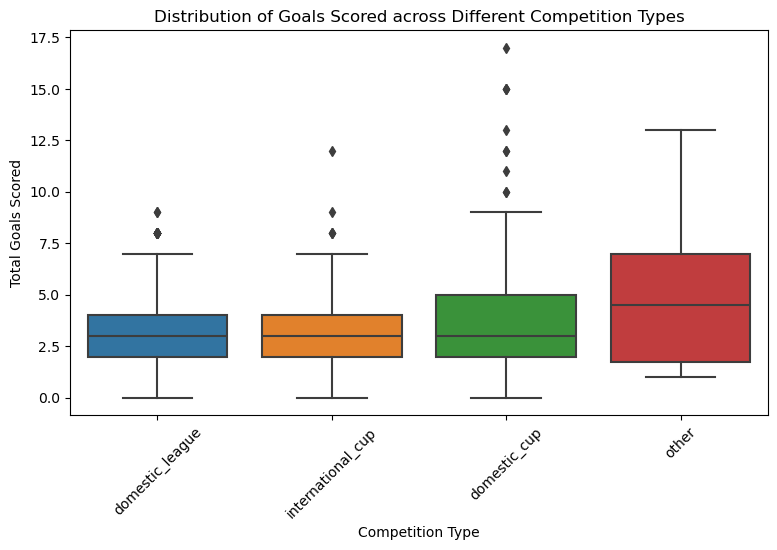

In [39]:
# Visualization 2 Box plot

# Box Plot
plt.figure(figsize=(9, 5))
sns.boxplot(data=games, x='competition_type', y='total_goals')
plt.title('Distribution of Goals Scored across Different Competition Types')
plt.xlabel('Competition Type')
plt.ylabel('Total Goals Scored')
plt.xticks(rotation=45)
plt.show()

In [41]:
'''Interpretation:

Domestic League:
The median number of goals scored is around 2.5, with a fairly tight interquartile range (IQR).
There are a few outliers, but the majority of matches have a consistent goal count.

International Cup:
Similar to the Domestic League, with a median around 2.5 goals and some outliers, indicating a consistent goal-scoring pattern.

Domestic Cup:
The median is slightly higher, around 2.5 to 3 goals, with more variability and several outliers,
including matches with very high goal counts (up to 17.5 goals).

Other Competitions:
This category shows the highest variability in goal counts, with a median closer to 4 goals and a wider IQR.
There are also outliers with high goal totals.'''

'Interpretation:\n\nDomestic League:\nThe median number of goals scored is around 2.5, with a fairly tight interquartile range (IQR).\nThere are a few outliers, but the majority of matches have a consistent goal count.\n\nInternational Cup:\nSimilar to the Domestic League, with a median around 2.5 goals and some outliers, indicating a consistent goal-scoring pattern.\n\nDomestic Cup:\nThe median is slightly higher, around 2.5 to 3 goals, with more variability and several outliers,\nincluding matches with very high goal counts (up to 17.5 goals).\n\nOther Competitions:\nThis category shows the highest variability in goal counts, with a median closer to 4 goals and a wider IQR.\nThere are also outliers with high goal totals.'

In [43]:
'''Overall Interpretation:

Consistency in Domestic Leagues and International Cups: The scatter plot and box plot both indicate that domestic league
and international cup matches tend to have more consistent goal-scoring patterns, with fewer matches having extreme goal counts.

Variability in Domestic Cups and Other Competitions: In contrast, domestic cups and other competitions exhibit more variability in the number of
goals scored. This could be due to differences in team strengths, competition formats, or other factors.

Outliers and High-Scoring Matches: Both the domestic cups and other competitions have outliers,with some matches having very high goal totals.
This suggests that these competitions may include matches where the goal difference between teams is large.'''

'Overall Interpretation:\n\nConsistency in Domestic Leagues and International Cups: The scatter plot and box plot both indicate that domestic league\nand international cup matches tend to have more consistent goal-scoring patterns, with fewer matches having extreme goal counts.\n\nVariability in Domestic Cups and Other Competitions: In contrast, domestic cups and other competitions exhibit more variability in the number of\ngoals scored. This could be due to differences in team strengths, competition formats, or other factors.\n\nOutliers and High-Scoring Matches: Both the domestic cups and other competitions have outliers,with some matches having very high goal totals.\nThis suggests that these competitions may include matches where the goal difference between teams is large.'

In [45]:
# 2 - Player Performance and Market value

# •	Question 1: How does a player's position on the field influence their market value?

# First, we'll focus on analyzing how a player's position influences their market value.

# Merge players data with their market value
player_market_value = players[['position', 'market_value_in_eur']].dropna()

# Convert market_value_in_eur to numerical if it is not already
player_market_value['market_value_in_eur'] = player_market_value['market_value_in_eur'].replace('[\€,]', '', regex=True).astype(float)

# Group by position and calculate average market value
position_value = player_market_value.groupby('position')['market_value_in_eur'].mean().reset_index()

# Sort by market value
position_value = position_value.sort_values(by='market_value_in_eur', ascending=False)


In [47]:
# Visualization 1 Bar Plot

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Bar plot for average market value by position
plt.figure(figsize=(8, 5))
sns.barplot(x='market_value_in_eur', y='position', data=position_value, palette='viridis')
plt.title('Average Market Value by Player Position')
plt.xlabel('Average Market Value (EUR)')
plt.ylabel('Player Position')
plt.show()

In [49]:
'''Interpretation:
Midfielders have the highest average market value, followed closely by Defenders and Attackers.
Goalkeepers have the lowest average market value among the positions.
This trend suggests that midfielders are typically valued higher in the market, possibly due to their central role in both defense and attack.'''

'Interpretation:\nMidfielders have the highest average market value, followed closely by Defenders and Attackers.\nGoalkeepers have the lowest average market value among the positions.\nThis trend suggests that midfielders are typically valued higher in the market, possibly due to their central role in both defense and attack.'

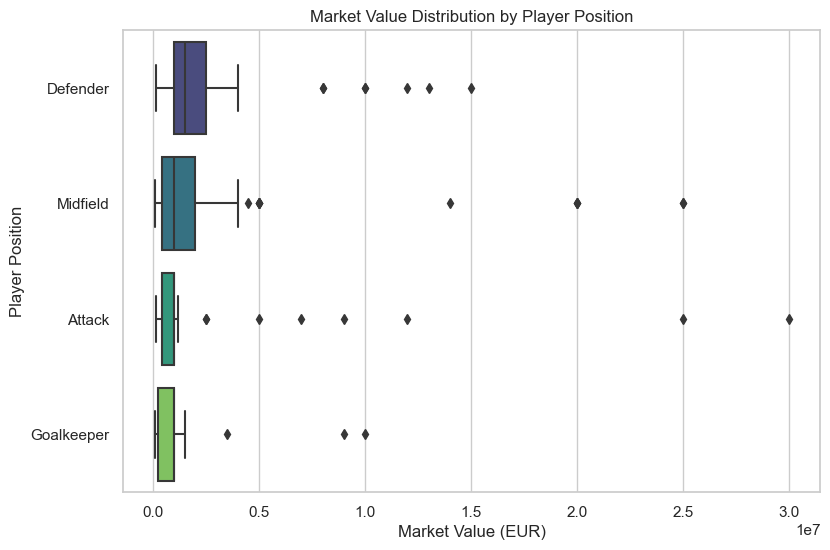

In [51]:
# Visualization 2 Box Plot

plt.figure(figsize=(9, 6))
sns.boxplot(x='market_value_in_eur', y='position', data=player_market_value, palette='viridis')
plt.title('Market Value Distribution by Player Position')
plt.xlabel('Market Value (EUR)')
plt.ylabel('Player Position')
plt.show()

In [53]:
'''Interpretation:
Defenders and Midfielders show a wider spread of market values, indicating that there are players within these positions who vary significantly in value.
Both positions have outliers with very high market values.

Attackers also show a significant spread, though slightly less than midfielders and defenders. There are outliers with high market values,
indicating a few attackers are highly valued.

Goalkeepers show the least variation in market values, with a more concentrated distribution and fewer outliers,
indicating that goalkeepers are generally valued within a narrower range.'''

'Interpretation:\nDefenders and Midfielders show a wider spread of market values, indicating that there are players within these positions who vary significantly in value.\nBoth positions have outliers with very high market values.\n\nAttackers also show a significant spread, though slightly less than midfielders and defenders. There are outliers with high market values,\nindicating a few attackers are highly valued.\n\nGoalkeepers show the least variation in market values, with a more concentrated distribution and fewer outliers,\nindicating that goalkeepers are generally valued within a narrower range.'

In [55]:
# 2 - Player Performance and Market value

# Question 2: What is the correlation between player attributes (height) and their market value?



# Calculate correlation
correlation = players[['height_in_cm', 'market_value_in_eur']].corr().iloc[0, 1]
print(f'Correlation between height and market value: {correlation:.2f}')


Correlation between height and market value: -0.07


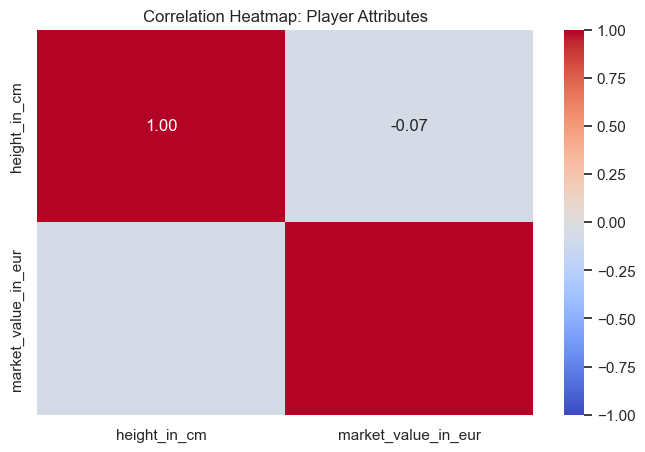

In [57]:
# Visualization 1 Heatmap

# Correlation heatmap
plt.figure(figsize=(8, 5))
correlation_matrix = players[['height_in_cm', 'market_value_in_eur']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Player Attributes')
plt.show()

In [59]:
'''Interpretation: A correlation of -0.07 suggests that there is almost no relationship between a player's height and their market value.
As height increases or decreases, market value does not follow a clear trend in either direction.'''

"Interpretation: A correlation of -0.07 suggests that there is almost no relationship between a player's height and their market value.\nAs height increases or decreases, market value does not follow a clear trend in either direction."

In [61]:
# Visualization 2 Scatter Plot 

# Scatter plot of height vs. market value
plt.figure(figsize=(9, 5))
sns.scatterplot(x='height_in_cm', y='market_value_in_eur', data=players)
plt.title('Scatter Plot: Height vs. Market Value')
plt.xlabel('Height (cm)')
plt.ylabel('Market Value (EUR)')
plt.xscale('linear')
plt.yscale('log')  # Market value can vary widely, so log scale may help with visibility
plt.show()

In [63]:
'''Interpretation: The scatter plot supports the heatmap's finding. The lack of a discernible trend or pattern indicates that
                    height is not a strong predictor of market value for the players in this dataset.
                  The weak negative correlation seen in the heatmap (-0.07) is reflected here, with no apparent relationship between the two variables.'''

"Interpretation: The scatter plot supports the heatmap's finding. The lack of a discernible trend or pattern indicates that\n                    height is not a strong predictor of market value for the players in this dataset.\n                  The weak negative correlation seen in the heatmap (-0.07) is reflected here, with no apparent relationship between the two variables."

In [65]:
# 3 - Team Comparison

#	Question 1: Which teams have the most consistent performance across different seasons?

# Calculate Team Performance
#  Here, performance is measured as the difference in goals between the home and away teams.

# Calculate goal difference for each game
games['goal_difference'] = games['home_club_goals'] - games['away_club_goals']

# Group by season and team name, then calculate the mean goal difference
team_performance = games.groupby(['season', 'home_club_name'])['goal_difference'].mean().reset_index()

# Calculate the standard deviation of goal difference across seasons to measure consistency
team_consistency = team_performance.groupby('home_club_name')['goal_difference'].std().reset_index()
team_consistency.columns = ['team_name', 'performance_std']

In [67]:
# Identify Consistent Teams
# The teams with the lowest standard deviation in performance are considered the most consistent.

# Sort by performance consistency (lower standard deviation is better)
consistent_teams = team_consistency.sort_values(by='performance_std').head(10)
print(consistent_teams)

                             team_name  performance_std
132  Koninklijke Voetbal Club Westerlo         0.000000
27           Associazione Calcio Milan         0.000000
18                           Amiens SC         0.000000
43                         CD Nacional         0.000000
187                           SD Eibar         0.000000
217           The Celtic Football Club         0.050000
58                    Dundee United FC         0.176777
202             Sport Lisboa e Benfica         0.192450
76                    FC Ingolstadt 04         0.271964
28          Associazione Sportiva Roma         0.279121


In [69]:
# Visualization 1: Bar Plot of Performance Consistency


plt.figure(figsize=(6, 4))
sns.barplot(data=consistent_teams, x='performance_std', y='team_name', palette='viridis')
plt.title('Top 10 Most Consistent Teams Across Seasons')
plt.xlabel('Performance Consistency (Lower is Better)')
plt.ylabel('Team Name')
plt.show()

In [71]:
'''Interpretation:

The celtic Football club has the lowest standard deviation, indicating they are the most consistent team across seasons in terms of performance.
The teams are ranked from lowest to highest standard deviation, showing their consistency, with smaller bars indicating better performance stability.'''

'Interpretation:\n\nThe celtic Football club has the lowest standard deviation, indicating they are the most consistent team across seasons in terms of performance.\nThe teams are ranked from lowest to highest standard deviation, showing their consistency, with smaller bars indicating better performance stability.'

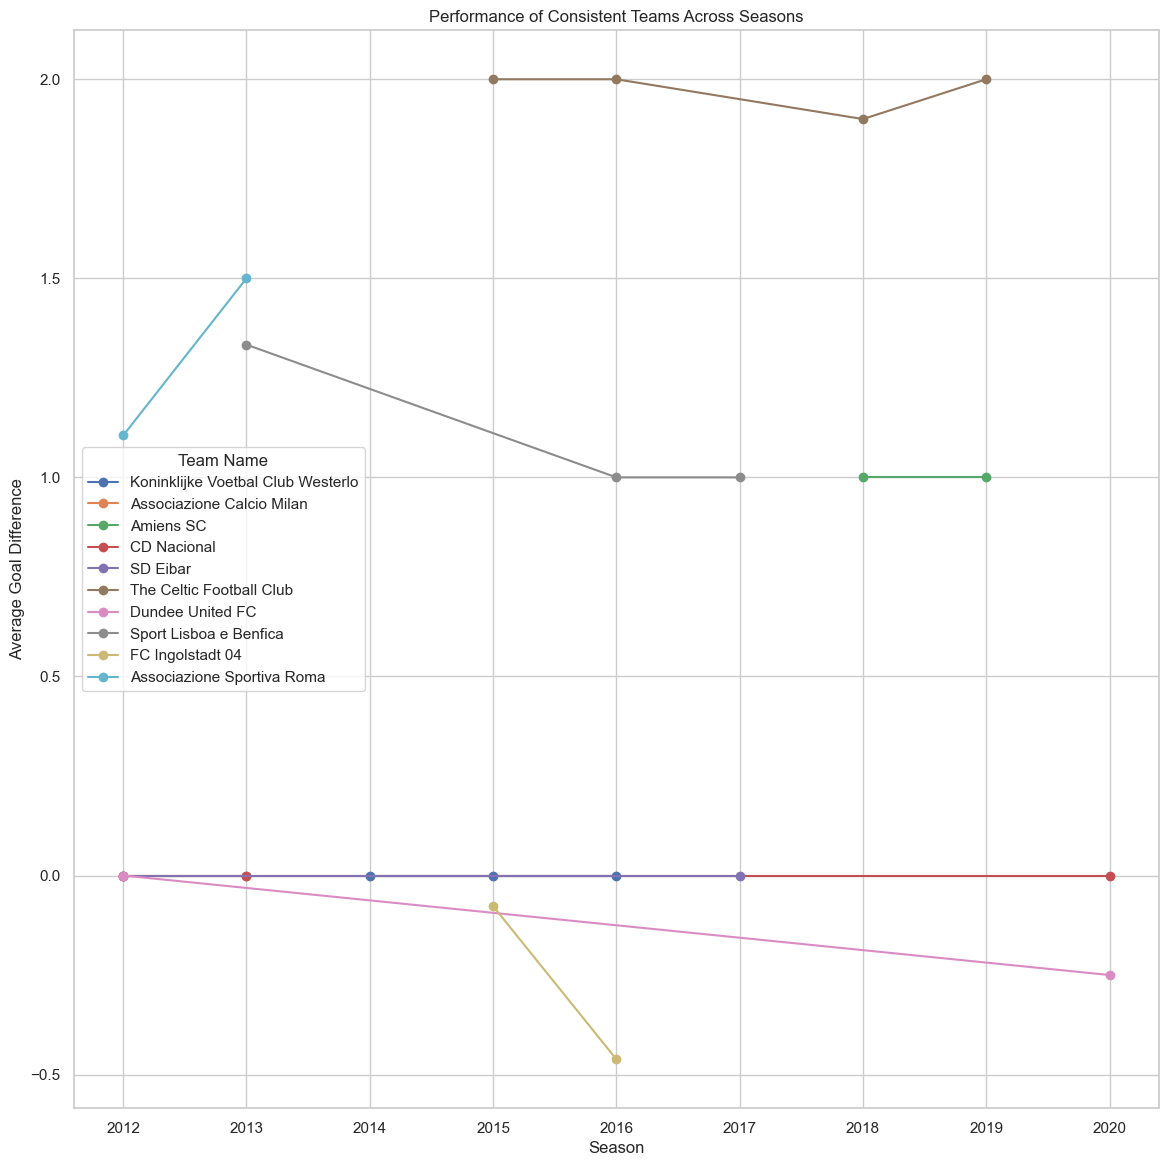

In [73]:
# Visualization 2: Line Plot of Performance Over Seasons


plt.figure(figsize=(14, 14))
for team in consistent_teams['team_name']:
    team_data = team_performance[team_performance['home_club_name'] == team]
    plt.plot(team_data['season'], team_data['goal_difference'], marker='o', label=team)

plt.title('Performance of Consistent Teams Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Goal Difference')
plt.legend(title='Team Name')
plt.show()

In [75]:
'''
Interpretation 
The celtic Football club:Exhibits a positive and balanced  trend in goal difference, suggesting improved performance consistency over time.
Dundee United FC : Have relatively flat or slightly declining trends, suggesting stable but not necessarily improving performance.'''

'\nInterpretation \nThe celtic Football club:Exhibits a positive and balanced  trend in goal difference, suggesting improved performance consistency over time.\nDundee United FC : Have relatively flat or slightly declining trends, suggesting stable but not necessarily improving performance.'

In [77]:
# 3 - Team Comparison
#	Question 2: How do the home and away goals compare across top teams in different competitions?



# Identify and filter out the top teams 

# Filter top teams by average goals
top_teams = merged_data.groupby('home_club_name')['home_club_goals'].mean().nlargest(5).index
top_teams_data = merged_data[merged_data['home_club_name'].isin(top_teams) | merged_data['away_club_name'].isin(top_teams)]

# Display the filtered data
top_teams_data.head()

game_id competition_id_x  season            round     date_x  \
8     2603931.0             UKR1  2015.0     18. Matchday 2016-03-12   
974   2538963.0               EL  2014.0  last 16 2nd leg 2015-03-19   
1040  2538955.0               EL  2014.0  last 16 1st leg 2015-03-12   
1716  2240143.0              PO1  2012.0     13. Matchday 2013-01-05   
1991  3098734.0               EL  2018.0          group K 2018-11-08   

      home_club_goals  away_club_goals  home_club_position  \
8                 4.0              0.0                 3.0   
974               5.0              2.0                 3.0   
1040              2.0              1.0                 3.0   
1716              4.0              2.0                11.0   
1991              3.0              1.0                 3.0   

      away_club_position home_club_manager_name  ... country_of_birth  \
8                   12.0         Yuriy Vernydub  ...            UdSSR   
974                 10.0          Sergiy Rebrov  ...    United States   
1040                10.0       Roberto Martínez  ...    United States   
1716                15.0          Pedro Emanuel  ...    United States   
1991                10.0  Aleksandr Khatskevich  ...    United States   

     date_of_birth    sub_position  position_y   foot height_in_cm  \
8       1988-11-17  Centre-Forward      Attack  right        175.0   
974     1979-03-06      Goalkeeper  Goalkeeper  right        191.0   
1040    1979-03-06      Goalkeeper  Goalkeeper  right        191.0   
1716    1987-05-20      Goalkeeper  Goalkeeper  right        190.0   
1991    1996-04-26  Centre-Forward      Attack  right        191.0   

     market_value_in_eur highest_market_value_in_eur contract_expiration_date  \
8              1000000.0                    500000.0               2025-06-30   
974            1000000.0                  10000000.0               2025-06-30   
1040           1000000.0                  10000000.0               2025-06-30   
1716           1000000.0                    400000.0               2025-06-30   
1991           7000000.0                  10000000.0               2024-06-30   

     agent_name  
8      Prosport  
974   Wasserman  
1040  Wasserman  
1716  Wasserman  
1991  Gestifute  

[5 rows x 57 columns]

In [79]:
#  Group Data by Competition and Team
# Group the data to compare home and away goals across different competitions for these top teams:


# Group by competition, team, and calculate total home and away goals
goals_comparison = top_teams_data.groupby(['competition_id_x', 'home_club_name', 'away_club_name']).agg(
    total_home_goals=('home_club_goals', 'sum'),
    total_away_goals=('away_club_goals', 'sum')
).reset_index()

# Display the comparison data
goals_comparison.head()

competition_id_x                   home_club_name  \
0               EL            Everton Football Club   
1               EL       Futbolniy Klub Dynamo Kyiv   
2               EL       Futbolniy Klub Dynamo Kyiv   
3              FAC  Nottingham Forest Football Club   
4              NL1         De Graafschap Doetinchem   

                  away_club_name  total_home_goals  total_away_goals  
0     Futbolniy Klub Dynamo Kyiv               2.0               1.0  
1          Everton Football Club               5.0               2.0  
2    Stade Rennais Football Club               3.0               1.0  
3  West Ham United Football Club              10.0               0.0  
4   Fortuna Sittardia Combinatie               5.0               1.0

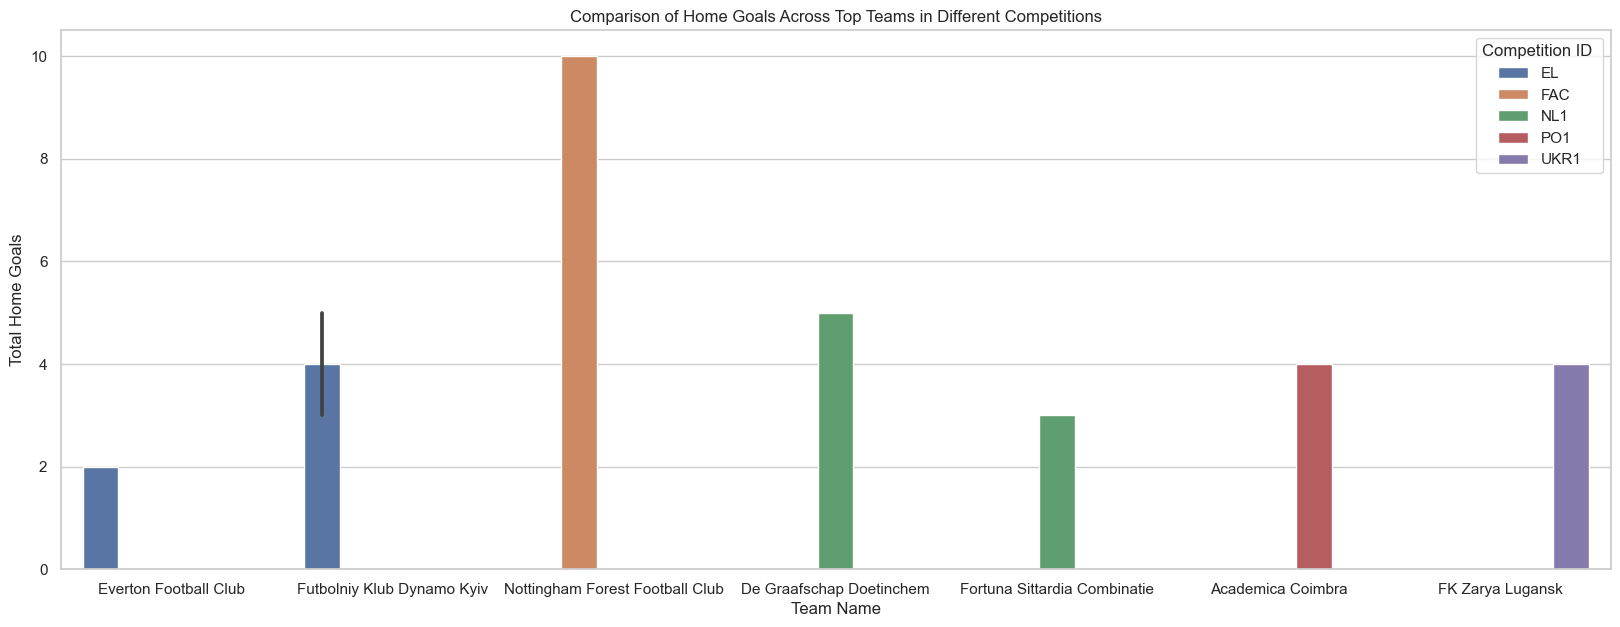

In [81]:
# Visualization 1 - Bar Plot of Home and Away Goals

# Set up the plot
plt.figure(figsize=(20, 7))
sns.barplot(data=goals_comparison, x='home_club_name', y='total_home_goals', hue='competition_id_x')

# Add labels and title
plt.title('Comparison of Home Goals Across Top Teams in Different Competitions')
plt.xlabel('Team Name')
plt.ylabel('Total Home Goals')
plt.legend(title='Competition ID ')

# Show the plot
plt.show()

In [83]:
'''Interpretation:

Nottingham Forest Football Club has the highest number of home goals, significantly more than the other teams.

Futbolniy Klub Dynamo Kyiv also has a relatively high number of home goals, though much less than Nottingham Forest.

Other teams like De Graafschap Doetinchem, Academica Coimbra, and FK Zarya Lugansk have moderate numbers of home goals,
while Everton Football Club and Fortuna Sittardia Combinatie have the lowest.

The variation in home goals could be influenced by factors such as the competition level, team strategy,
or even the strength of the opponents faced at home.'''

'Interpretation:\n\nNottingham Forest Football Club has the highest number of home goals, significantly more than the other teams.\n\nFutbolniy Klub Dynamo Kyiv also has a relatively high number of home goals, though much less than Nottingham Forest.\n\nOther teams like De Graafschap Doetinchem, Academica Coimbra, and FK Zarya Lugansk have moderate numbers of home goals,\nwhile Everton Football Club and Fortuna Sittardia Combinatie have the lowest.\n\nThe variation in home goals could be influenced by factors such as the competition level, team strategy,\nor even the strength of the opponents faced at home.'

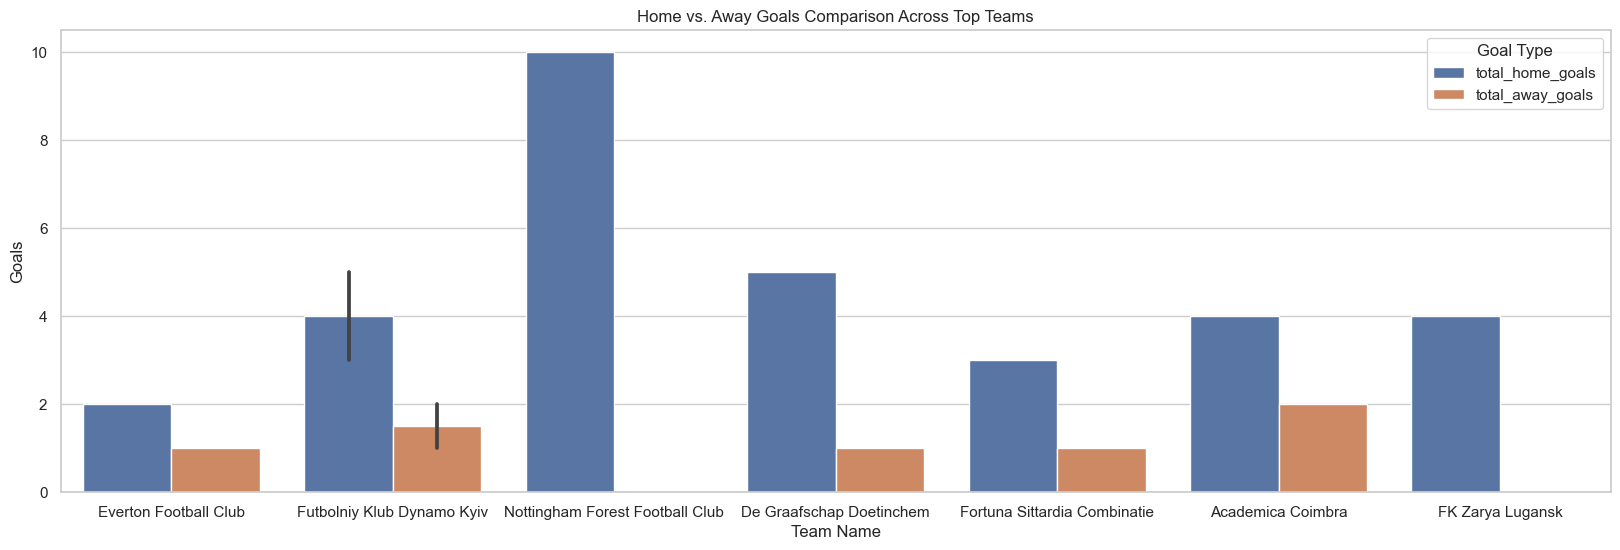

In [85]:
# Visualization 2 - Comparison of Home vs. Away Goals (Stacked Bar Plot)

# Set up the plot
goals_comparison_melted = goals_comparison.melt(id_vars=['competition_id_x', 'home_club_name'],
                                                value_vars=['total_home_goals', 'total_away_goals'],
                                                var_name='Goal Type', value_name='Goals')

plt.figure(figsize=(20, 6))
sns.barplot(data=goals_comparison_melted, x='home_club_name', y='Goals', hue='Goal Type')

# Add labels and title
plt.title('Home vs. Away Goals Comparison Across Top Teams')
plt.xlabel('Team Name')
plt.ylabel('Goals')
plt.legend(title='Goal Type')

# Show the plot
plt.show()

In [87]:
'''
Interpretation:

For most teams, total home goals (blue) are higher than total away goals (brown), indicating a common trend where teams perform better at home.

Nottingham Forest Football Club has the highest number of home goals and no away goals, suggesting strong home performance or a limited sample size.

Futbolniy Klub Dynamo Kyiv also shows a significant disparity between home and away goals, with more goals scored at home.

Teams like De Graafschap Doetinchem and Academica Coimbra also have more home goals, but the gap between home and away goals is less pronounced.

Everton Football Club, Fortuna Sittardia Combinatie, and FK Zarya Lugansk have low goal counts overall, with a slight edge in home goals.

The pattern suggests that home-field advantage plays a role in most teams' performances, but the extent of this advantage varies.'''

"\nInterpretation:\n\nFor most teams, total home goals (blue) are higher than total away goals (brown), indicating a common trend where teams perform better at home.\n\nNottingham Forest Football Club has the highest number of home goals and no away goals, suggesting strong home performance or a limited sample size.\n\nFutbolniy Klub Dynamo Kyiv also shows a significant disparity between home and away goals, with more goals scored at home.\n\nTeams like De Graafschap Doetinchem and Academica Coimbra also have more home goals, but the gap between home and away goals is less pronounced.\n\nEverton Football Club, Fortuna Sittardia Combinatie, and FK Zarya Lugansk have low goal counts overall, with a slight edge in home goals.\n\nThe pattern suggests that home-field advantage plays a role in most teams' performances, but the extent of this advantage varies."

In [89]:
'''Overall Insights:
Home-field advantage is evident for most teams, with significantly higher goals scored at home compared to away matches.
Nottingham Forest and Futbolniy Klub Dynamo Kyiv stand out as strong home teams, whereas other teams show a more balanced but still home-favored performance.'''

'Overall Insights:\nHome-field advantage is evident for most teams, with significantly higher goals scored at home compared to away matches.\nNottingham Forest and Futbolniy Klub Dynamo Kyiv stand out as strong home teams, whereas other teams show a more balanced but still home-favored performance.'

In [91]:
# 4- Attendance and Stadium Analysis
#	Question 1: How does stadium capacity and attendance vary across different competitions?


#  Analyze Stadium Capacity and Attendance Across Competitions
# First, group the data by competition_id_x and calculate the average attendance.


# Group by competition and calculate the average attendance
attendance_analysis = merged_data.groupby('competition_id_x').agg({
    'attendance': 'mean',
    'stadium': 'count'
}).reset_index()

# Rename columns for clarity
attendance_analysis.columns = ['Competition', 'Average Attendance', 'Number of Matches']

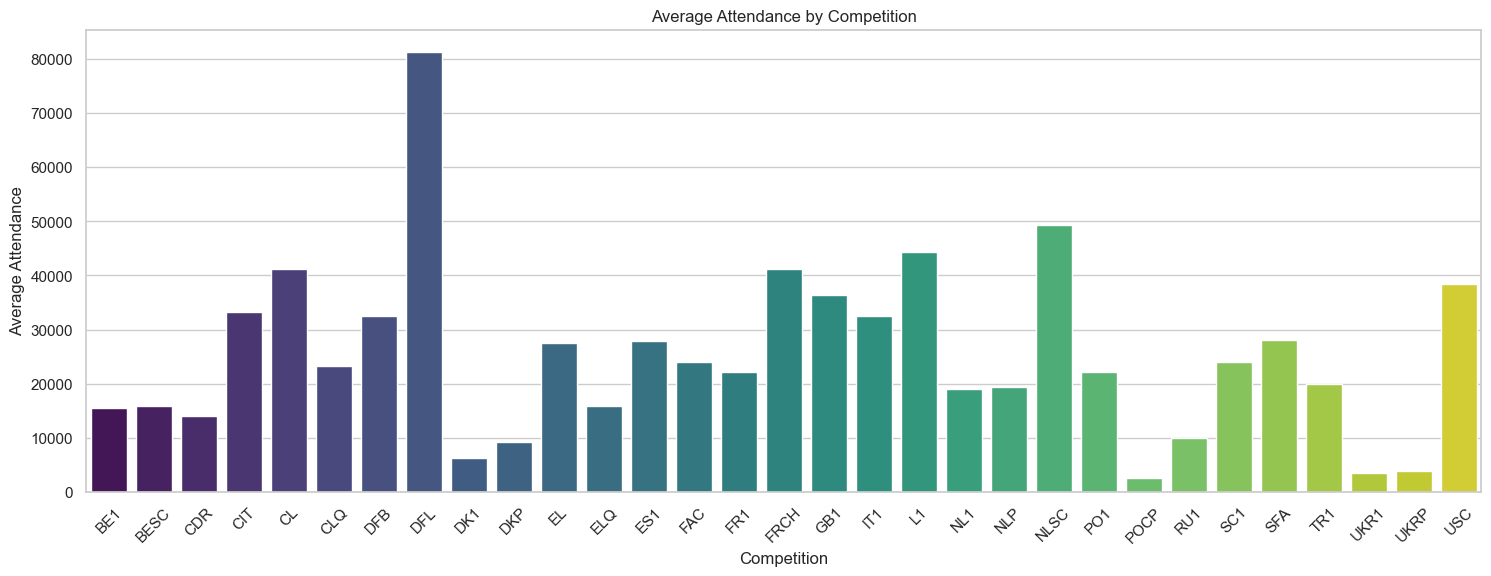

In [93]:
# Visualization 1 - Bar plot Average Attendance by Competition


# Bar plot for average attendance by competition
plt.figure(figsize=(18, 6))
sns.barplot(data=attendance_analysis, x='Competition', y='Average Attendance', palette='viridis')
plt.title('Average Attendance by Competition')
plt.xlabel('Competition')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.show()

In [95]:
'''
Interpretation:

The competition labeled "DFL" has the highest average attendance, exceeding 80,000, indicating strong spectator interest.
Competitions like "EL," "GB1," and "L1" also show relatively high average attendance, ranging from around 30,000 to 50,000.
Some competitions, such as "DX1" and "UKR1," have significantly lower average attendance, below 10,000, indicating less spectator engagement.
The variation in attendance suggests different levels of popularity and stadium capacity across the competitions  '''

'\nInterpretation:\n\nThe competition labeled "DFL" has the highest average attendance, exceeding 80,000, indicating strong spectator interest.\nCompetitions like "EL," "GB1," and "L1" also show relatively high average attendance, ranging from around 30,000 to 50,000.\nSome competitions, such as "DX1" and "UKR1," have significantly lower average attendance, below 10,000, indicating less spectator engagement.\nThe variation in attendance suggests different levels of popularity and stadium capacity across the competitions  '

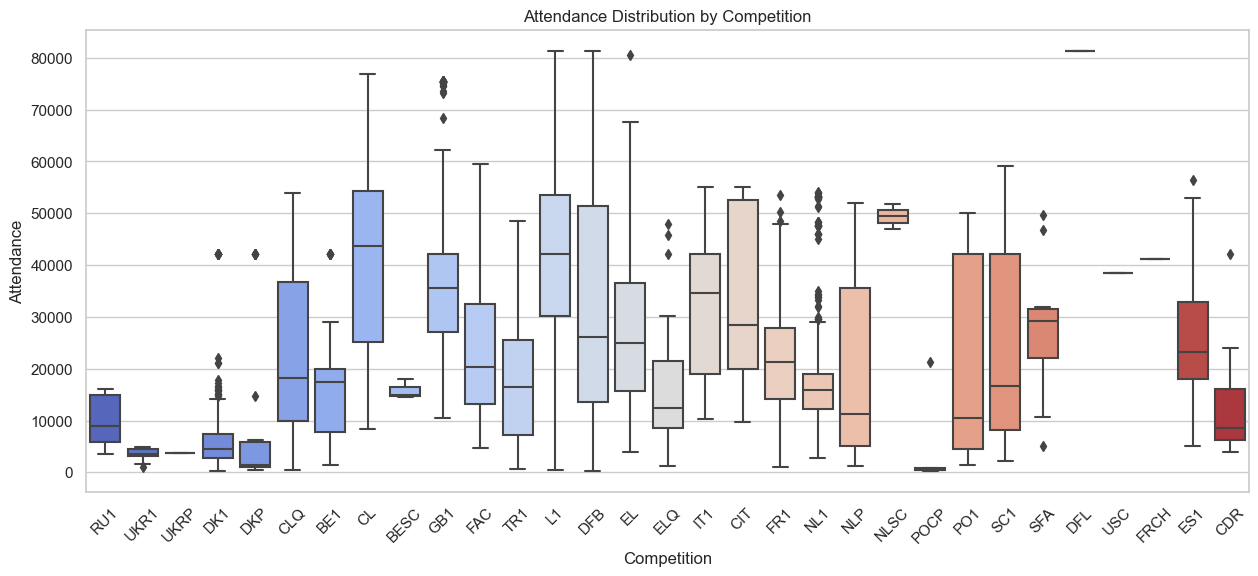

In [97]:
# Visualization 2 - Box plot Attendance Distribution Across Competitions


# Box plot for attendance distribution by competition
plt.figure(figsize=(15, 6))
sns.boxplot(data=merged_data, x='competition_id_x', y='attendance', palette='coolwarm')
plt.title('Attendance Distribution by Competition')
plt.xlabel('Competition')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.show()

In [99]:
'''
Interpretation:

The "DFL" competition has a high median attendance and a relatively narrow IQR, indicating consistent high attendance figures.
Competitions like "FR1," "GB1," and "L1" show a wider IQR, suggesting more variability in attendance across different matches.
Competitions such as "DX1" and "UKR1" have low median attendance and a narrow IQR, indicating consistently low attendance.
Outliers are present in many competitions, particularly in those with lower average attendance, showing that certain matches attracted
significantly more or fewer spectators than typical. '''

'\nInterpretation:\n\nThe "DFL" competition has a high median attendance and a relatively narrow IQR, indicating consistent high attendance figures.\nCompetitions like "FR1," "GB1," and "L1" show a wider IQR, suggesting more variability in attendance across different matches.\nCompetitions such as "DX1" and "UKR1" have low median attendance and a narrow IQR, indicating consistently low attendance.\nOutliers are present in many competitions, particularly in those with lower average attendance, showing that certain matches attracted\nsignificantly more or fewer spectators than typical. '

In [101]:
# 4- Attendance and Stadium Analysis

# •	Question 2: What is the relationship between match attendance and the home team's league position?

# Analyze the Relationship
# Now, let's analyze the relationship between attendance and home_club_position.

# Analyze the relationship
correlation = merged_data['attendance'].corr(merged_data['home_club_position'])
print(f"Correlation between attendance and home club position: {correlation:.2f}")

Correlation between attendance and home club position: -0.09


In [103]:
# Visualization 1 - Scatter Plot
# a scatter plot to visualize the relationship between attendance and the home team's position.


plt.figure(figsize=(14, 5))
sns.scatterplot(x='home_club_position', y='attendance', data=merged_data)
plt.title('Relationship between Match Attendance and Home Team Position')
plt.xlabel('Home Team Position')
plt.ylabel('Attendance')
plt.show()

In [105]:
'''
Interpretation

Overall Trend: The plot suggests that higher attendance is more frequent when the home team is in the top positions (closer to 1st place).
As the home team’s position worsens (moving towards 20th), the spread of attendance seems to decrease, with fewer matches drawing large crowds.

Clustering: The plot shows dense clustering in specific home team positions, particularly around positions 2.5, 5.0, and 7.5, 
indicating that matches involving teams in these positions attract a range of attendances, often quite high. '''

'\nInterpretation\n\nOverall Trend: The plot suggests that higher attendance is more frequent when the home team is in the top positions (closer to 1st place).\nAs the home team’s position worsens (moving towards 20th), the spread of attendance seems to decrease, with fewer matches drawing large crowds.\n\nClustering: The plot shows dense clustering in specific home team positions, particularly around positions 2.5, 5.0, and 7.5, \nindicating that matches involving teams in these positions attract a range of attendances, often quite high. '

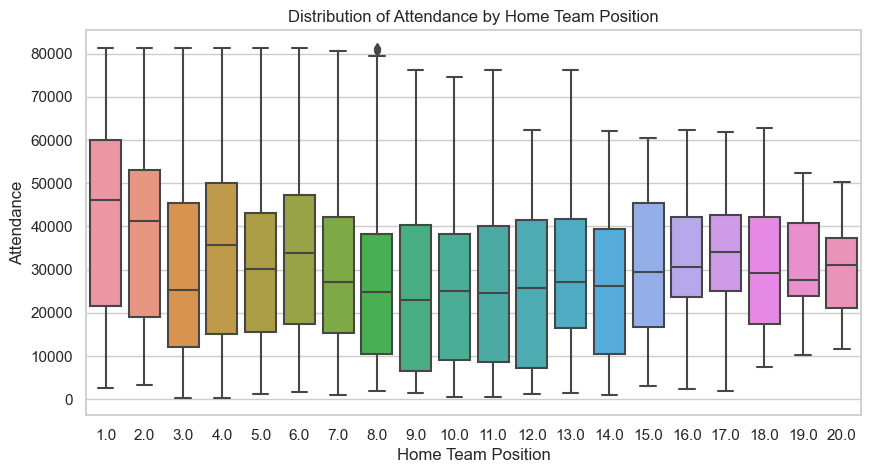

In [107]:
# Visualization 2 - Box Plot
# A box plot can provide more insight into the distribution of attendance across different home team positions.


plt.figure(figsize=(10, 5))
sns.boxplot(x='home_club_position', y='attendance', data=merged_data)
plt.title('Distribution of Attendance by Home Team Position')
plt.xlabel('Home Team Position')
plt.ylabel('Attendance')
plt.show()

In [109]:
'''
Interpretation

Central Tendency: The median attendance tends to be higher for teams that are in the top positions (1st to 3rd). 
The median attendance generally decreases as the team position gets worse (higher position numbers).

Spread: The spread of attendance (indicated by the height of the boxes and the whiskers) is wider for top positions (1st to 3rd), 
showing a broader range of attendance figures. As you move to lower team positions, the spread becomes narrower, suggesting more consistent (but lower) attendance numbers.

Outliers: There are a few outliers present in the box plots, especially in the top team positions,
indicating occasional matches that attracted significantly higher or lower crowds than typical for those positions. '''

'\nInterpretation\n\nCentral Tendency: The median attendance tends to be higher for teams that are in the top positions (1st to 3rd). \nThe median attendance generally decreases as the team position gets worse (higher position numbers).\n\nSpread: The spread of attendance (indicated by the height of the boxes and the whiskers) is wider for top positions (1st to 3rd), \nshowing a broader range of attendance figures. As you move to lower team positions, the spread becomes narrower, suggesting more consistent (but lower) attendance numbers.\n\nOutliers: There are a few outliers present in the box plots, especially in the top team positions,\nindicating occasional matches that attracted significantly higher or lower crowds than typical for those positions. '

In [111]:
''' Conclusion:
Both the scatter plot and box plot suggest that match attendance is positively correlated with better home team positions.
Teams in the top positions tend to draw larger and more variable crowds, while teams in lower positions see more consistent but generally
lower attendance figures.'''


' Conclusion:\nBoth the scatter plot and box plot suggest that match attendance is positively correlated with better home team positions.\nTeams in the top positions tend to draw larger and more variable crowds, while teams in lower positions see more consistent but generally\nlower attendance figures.'

In [115]:
# 5 - Referee Analysis

#  Question 1: Which referees officiate the most games, and how do they affect game outcomes (e.g., number of fouls, yellow/red cards)?


# Filtering relevant columns
referee_analysis_df = merged_data[['referee', 'game_id', 'yellow_cards', 'red_cards', 'goals', 'assists']]


#  Determine which referees have officiated the most games:

#  Counting the number of games each referee officiated
referee_games = referee_analysis_df.groupby('referee')['game_id'].nunique().reset_index(name='games_officiated')

# Sorting the referees by the number of games officiated
top_referees = referee_games.sort_values(by='games_officiated', ascending=False).head(10)
print(top_referees)


               referee  games_officiated
100    Dr. Felix Brych                62
113       Felix Zwayer                59
203      Manuel Graofe                58
32      Anthony Taylor                57
214    Martin Atkinson                57
67   Christian Dingert                56
207        Marco Fritz                54
93       Deniz Aytekin                54
183       Kevin Friend                51
193          Lee Mason                51


In [117]:
# Analyze the impact of referees on yellow and red cards:


# Aggregating data to find average yellow and red cards per game by referee
referee_impact = referee_analysis_df.groupby('referee').agg({
    'yellow_cards': 'sum',
    'red_cards': 'sum',
    'game_id': 'nunique'
}).reset_index()

referee_impact['yellow_cards_per_game'] = referee_impact['yellow_cards'] / referee_impact['game_id']
referee_impact['red_cards_per_game'] = referee_impact['red_cards'] / referee_impact['game_id']

# Sorting by most impactful referees in terms of cards
impactful_referees = referee_impact.sort_values(by=['yellow_cards_per_game', 'red_cards_per_game'], ascending=False).head(10)
print(impactful_referees)

                            referee  yellow_cards  red_cards  game_id  \
345  jose antonio teixeira vitienes           2.0        0.0        1   
79                     Cuneyt Cakır           5.0        0.0        3   
247           Olegario Benquerenasa           3.0        0.0        2   
210                Marijo Strahonja           4.0        0.0        3   
27                 Andrea Gervasoni           3.0        0.0        3   
39                       Aydin Uslu           3.0        0.0        3   
58                  Bulent Yıldırım           1.0        0.0        1   
87                   Darren England           1.0        0.0        1   
110                     Espen Eskas           1.0        0.0        1   
117              Florian Badstubner           1.0        0.0        1   

     yellow_cards_per_game  red_cards_per_game  
345               2.000000                 0.0  
79                1.666667                 0.0  
247               1.500000                 0.0  


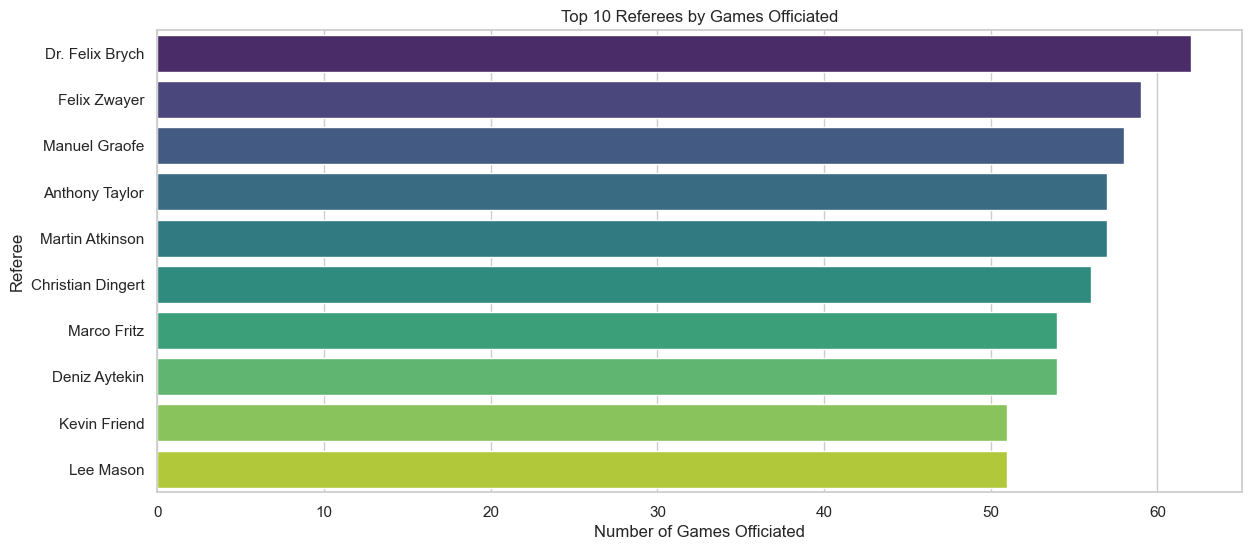

In [121]:
# Visualization 1 -Bar plot - Top Referees by Games Officiated


plt.figure(figsize=(14, 6))
sns.barplot(data=top_referees, x='games_officiated', y='referee', palette='viridis')
plt.title('Top 10 Referees by Games Officiated')
plt.xlabel('Number of Games Officiated')
plt.ylabel('Referee')
plt.show()

In [137]:
'''
Interpretation

Dr. Felix Brych has officiated the most games, leading with over 60 games.
The other referees, such as Felix Zwayer and Manuel Graefe, have officiated slightly fewer games, with counts decreasing gradually down the list.
This visualization highlights the experience level and involvement of each referee in various matches, with the top referees likely being 
trusted with more high-stakes or frequent matches. '''

'\nInterpretation\n\nDr. Felix Brych has officiated the most games, leading with over 60 games.\nThe other referees, such as Felix Zwayer and Manuel Graefe, have officiated slightly fewer games, with counts decreasing gradually down the list.\nThis visualization highlights the experience level and involvement of each referee in various matches, with the top referees likely being \ntrusted with more high-stakes or frequent matches. '

In [135]:
# Visualization 2 - Bar Plot for Average Yellow and Red Cards per Game by Referee

# This bar plot allows you to compare the average number of yellow and red cards given by each referee per game.

# Melt the dataframe for easier plotting with seaborn
impactful_referees_melted = impactful_referees.melt(
    id_vars='referee',
    value_vars=['yellow_cards_per_game', 'red_cards_per_game'],
    var_name='Card Type',
    value_name='Average Cards per Game'
)

plt.figure(figsize=(14, 6))
sns.barplot(data=impactful_referees_melted, x='Average Cards per Game', y='referee', hue='Card Type', palette='muted')
plt.title('Average Yellow and Red Cards per Game by Referee')
plt.xlabel('Average Cards per Game')
plt.ylabel('Referee')
plt.legend(title='Card Type')
plt.show()

In [139]:
'''
Interpretation

Jose Antonio Teixeira Vitienes has the highest average, distributing over 2 cards per game.
Cuneyt Cakir and Olegario Benquerensa follow closely, averaging around 1.5 cards per game.
Marijo Strahonja has a slightly lower average, indicating a more lenient or different officiating style compared to the others.
The variation in the average number of cards given by referees could reflect their strictness, the leagues they officiate in,
or the types of matches they typically oversee. '''

'\nInterpretation\n\nJose Antonio Teixeira Vitienes has the highest average, distributing over 2 cards per game.\nCuneyt Cakir and Olegario Benquerensa follow closely, averaging around 1.5 cards per game.\nMarijo Strahonja has a slightly lower average, indicating a more lenient or different officiating style compared to the others.\nThe variation in the average number of cards given by referees could reflect their strictness, the leagues they officiate in,\nor the types of matches they typically oversee. '

In [141]:
'''
overall insights

Referees like Jose Antonio Teixeira Vitienes might be more strict, leading to higher card averages, 
whereas others like Marijo Strahonja are more moderate in their officiating.
This information is useful for understanding the role of referees in the dynamics of football matches.  '''

'\noverall insights\n\nReferees like Jose Antonio Teixeira Vitienes might be more strict, leading to higher card averages, \nwhereas others like Marijo Strahonja are more moderate in their officiating.\nThis information is useful for understanding the role of referees in the dynamics of football matches.  '

In [205]:
# 5 - Referee Analysis

# Question 2-  Is there a pattern in the types of decision  based on the referee?


#  Merge DataFrames
# Merge games with game_events to get referee decision data
game_events_merged = pd.merge(game_events, games[['game_id', 'referee']], on='game_id', how='left')

#  Analyze Referee Decisions
# Count types of decisions (e.g., penalties, yellow cards) by referee
decision_counts = game_events_merged['type'].value_counts()
referee_decisions = game_events_merged.groupby(['referee', 'type']).size().reset_index(name='counts')


In [197]:
# Visualization    Bar plot of total counts of each decision type

plt.figure(figsize=(14, 5))
sns.barplot(x='type', y='counts', data=decision_counts.reset_index(name='counts'))
plt.title('Total Counts of Each Decision Type')
plt.xlabel('Decision Type')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [199]:
'''
Interpretation:
The bar plot shows that substitutions are significantly more common than goals and cards. 
This could imply that teams make more tactical decisions regarding player changes compared to scoring goals or issuing disciplinary actions.
The distribution highlights the relative rarity of goals and cards in comparison to the number of substitutions. '''

'\nInterpretation:\nThe bar plot shows that substitutions are significantly more common than goals and cards. \nThis could imply that teams make more tactical decisions regarding player changes compared to scoring goals or issuing disciplinary actions.\nThe distribution highlights the relative rarity of goals and cards in comparison to the number of substitutions. '